In [1]:
#importing libraries
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# Loading the dataset
data = pd.read_excel('/content/crop yield data sheet.xlsx')
data.shape


(109, 7)

In [ ]:
data.columns

Index(['Rain Fall (mm)', 'Fertilizer', 'Temperatue', 'Nitrogen (N)',
       'Phosphorus (P)', 'Potassium (K)', 'Yeild (Q/acre)'],
      dtype='object')

In [ ]:
data.head()

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
0,1230.0,80.0,28,80.0,24.0,20.0,12.0
1,480.0,60.0,36,70.0,20.0,18.0,8.0
2,1250.0,75.0,29,78.0,22.0,19.0,11.0
3,450.0,65.0,35,70.0,19.0,18.0,9.0
4,1200.0,80.0,27,79.0,22.0,19.0,11.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rain Fall (mm)  99 non-null     float64
 1   Fertilizer      99 non-null     float64
 2   Temperatue      100 non-null    object 
 3   Nitrogen (N)    99 non-null     float64
 4   Phosphorus (P)  99 non-null     float64
 5   Potassium (K)   99 non-null     float64
 6   Yeild (Q/acre)  99 non-null     float64
dtypes: float64(6), object(1)
memory usage: 6.1+ KB


In [ ]:
data.describe()

,Rain Fall (mm),Fertilizer,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,849.797980,67.808081,70.737374,21.131313,18.060606,9.050505
std,400.042676,10.028202,6.677079,1.951695,1.817254,1.965902
min,400.000000,50.000000,59.000000,18.000000,15.000000,5.500000
25%,450.000000,60.000000,65.000000,19.500000,16.000000,7.000000
50%,1150.000000,70.000000,71.000000,21.000000,19.000000,9.000000
75%,1237.500000,77.000000,77.000000,23.000000,19.000000,11.000000
max,1300.000000,80.000000,80.000000,25.000000,22.000000,12.000000


In [ ]:
print(X.isnull().sum())

Rain Fall (mm)    0
Fertilizer        0
Temperatue        0
Nitrogen (N)      0
Phosphorus (P)    0
Potassium (K)     0
dtype: int64


In [ ]:
# Separating features and target
X = data.drop(columns=['Yeild (Q/acre)'])
y = data['Yeild (Q/acre)']

# Data preprocessing: Converting to numeric and dropping NaN values
X = X.apply(pd.to_numeric, errors='coerce')
X = X.dropna()
y = y[X.index]

In [ ]:
# Feature Scaling: Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train and test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
# SVM Model
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train, y_train)

# Predicting on training and testing data
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

# Training and Testing Accuracy (R^2 score)
train_accuracy = svm_model.score(X_train, y_train)
test_accuracy = svm_model.score(X_test, y_test)

# Printing accuracy scores
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.89
Testing Accuracy: 0.88


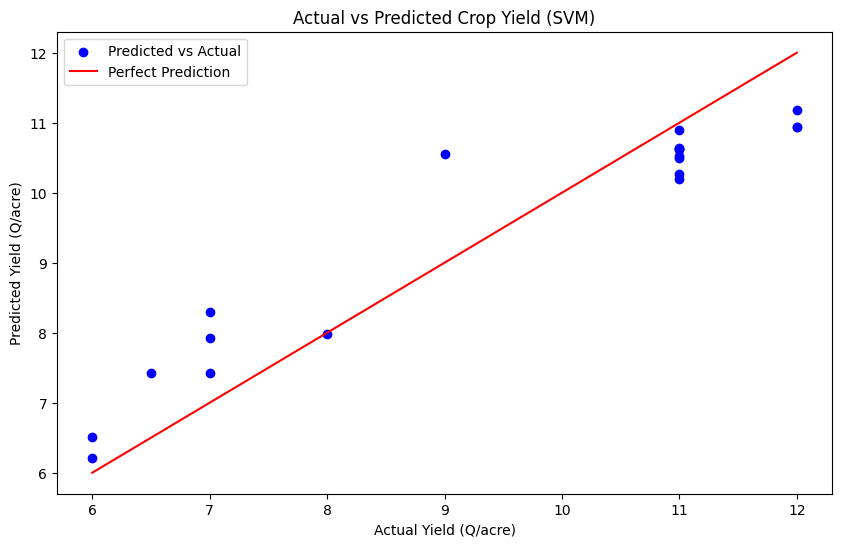

In [ ]:
# Plotting the actual vs predicted values for test data
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfect Prediction')
plt.xlabel('Actual Yield (Q/acre)')
plt.ylabel('Predicted Yield (Q/acre)')
plt.title('Actual vs Predicted Crop Yield (SVM)')
plt.legend()
plt.show()

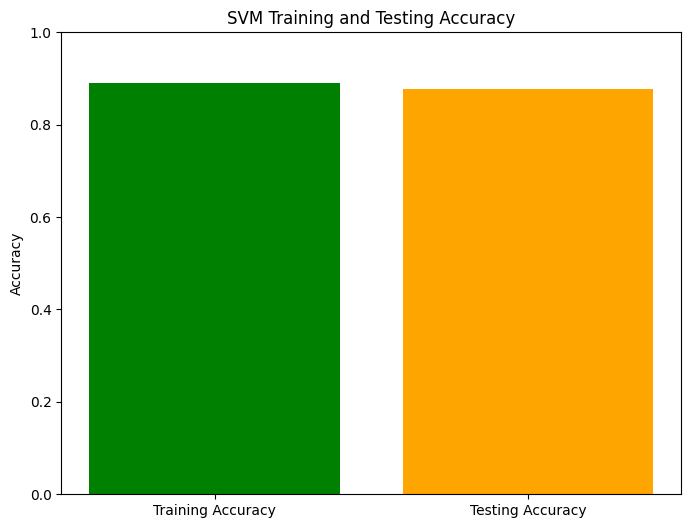

In [ ]:
# Plotting training and testing accuracy
plt.figure(figsize=(8, 6))
accuracies = [train_accuracy, test_accuracy]
labels = ['Training Accuracy', 'Testing Accuracy']
plt.bar(labels, accuracies, color=['green', 'orange'])
plt.ylim(0, 1) S
plt.title('SVM Training and Testing Accuracy')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
new_data = np.array([[700,45,30, 120, 70, 10]])
new_data_scaled = scaler.transform(new_data)
predicted_yield = svm_model.predict(new_data_scaled)
print(f"Predicted Crop Yield: {predicted_yield[0]:.2f} Q/acre")


Predicted Crop Yield: 8.78 Q/acre


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
